<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/Home_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [106]:
#importing data from excelsheet
home_office_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(home_office_sales)
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9831,9832,CA-2014-113257,2014-12-16,2014-12-18,Second Class,SC-20305,Sean Christensen,Consumer,United States,Beaumont,...,77705,Central,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,8.624,7,0.6,-2.5872
4910,4911,CA-2017-127306,2017-01-14,2017-01-18,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Johnson City,...,37604,South,OFF-PA-10000019,Office Supplies,Paper,Xerox 1931,36.288,7,0.2,12.7008
2227,2228,CA-2017-130771,2017-07-29,2017-08-03,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Austin,...,78745,Central,TEC-PH-10002496,Technology,Phones,Cisco SPA301,124.792,1,0.2,15.5990
9482,9483,CA-2015-158351,2015-06-20,2015-06-24,Second Class,BC-11125,Becky Castell,Home Office,United States,Philadelphia,...,19134,East,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,319.984,2,0.2,91.9954
927,928,CA-2015-115091,2015-10-05,2015-10-09,Standard Class,JJ-15760,Joel Jenkins,Home Office,United States,Springfield,...,22153,South,OFF-AR-10000658,Office Supplies,Art,Newell 324,46.200,4,0.0,12.9360


In [107]:
home_office=data.groupby("Segment")
home_office_mod=home_office.get_group("Home Office")
home_office_mod

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.3600,2,0.00,6.4128
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.5840,2,0.20,31.1980
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000
9978,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816


In [108]:
home_office_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [109]:
home_office_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 14 to 9979
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1783 non-null   int64         
 1   Order ID       1783 non-null   object        
 2   Order Date     1783 non-null   datetime64[ns]
 3   Ship Date      1783 non-null   datetime64[ns]
 4   Ship Mode      1783 non-null   object        
 5   Customer ID    1783 non-null   object        
 6   Customer Name  1783 non-null   object        
 7   Segment        1783 non-null   object        
 8   Country        1783 non-null   object        
 9   City           1783 non-null   object        
 10  State          1783 non-null   object        
 11  Postal Code    1783 non-null   int64         
 12  Region         1783 non-null   object        
 13  Product ID     1783 non-null   object        
 14  Category       1783 non-null   object        
 15  Sub-Category   1783 non-n

In [110]:
for i in home_office_mod.columns:
  print(i,':','\n',home_office_mod[i].unique())


Row ID : 
 [  15   16   35 ... 9978 9979 9980]
Order ID : 
 ['US-2015-118983' 'CA-2017-107727' 'CA-2015-117415' 'US-2015-164175'
 'US-2017-119662' 'CA-2016-159695' 'US-2017-109484' 'CA-2017-161018'
 'CA-2016-158568' 'CA-2015-129476' 'US-2014-152030' 'US-2016-125969'
 'CA-2014-110072' 'CA-2016-158834' 'CA-2015-118948' 'CA-2015-137225'
 'CA-2014-158274' 'CA-2014-123260' 'CA-2015-102281' 'CA-2017-107720'
 'US-2017-100930' 'CA-2014-131926' 'CA-2016-110772' 'CA-2014-111003'
 'CA-2014-164973' 'CA-2016-129714' 'CA-2017-102946' 'CA-2015-122259'
 'CA-2014-101476' 'US-2016-123750' 'CA-2016-147375' 'CA-2016-109869'
 'US-2015-101399' 'CA-2017-140963' 'CA-2014-133753' 'CA-2017-127432'
 'CA-2017-113558' 'CA-2015-147851' 'CA-2017-162929' 'CA-2017-163020'
 'CA-2016-115917' 'US-2017-127719' 'CA-2017-126221' 'CA-2016-132661'
 'US-2016-156097' 'US-2017-106663' 'CA-2015-119291' 'CA-2014-113887'
 'CA-2014-104472' 'CA-2016-112942' 'CA-2014-117429' 'CA-2017-131954'
 'CA-2014-112326' 'CA-2015-144267' 'US-2017

In [111]:
home_office_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,1783.000000,1783,1783,1783,1783,1783,1783,1783,1783,1783,...,1783.000000,1783,1783,1783,1783,1783,1783.000000,1783.000000,1783.000000,1783.000000
unique,NaN,909,NaN,NaN,4,148,148,1,1,264,...,NaN,4,1112,3,17,1106,NaN,NaN,NaN,NaN
top,NaN,US-2016-108504,NaN,NaN,Standard Class,MA-17560,Matt Abelman,Home Office,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,1071,34,34,1783,1783,145,...,NaN,571,8,1079,270,13,NaN,NaN,NaN,NaN
mean,4968.565339,NaN,2016-06-01 10:59:49.904655104,2016-06-05 09:07:34.290521600,NaN,NaN,NaN,NaN,NaN,NaN,...,55051.998317,NaN,NaN,NaN,NaN,NaN,240.972041,3.782389,0.147128,33.818664
min,15.000000,NaN,2014-01-04 00:00:00,2014-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.990000,1.000000,0.000000,-3399.980000
25%,2583.500000,NaN,2015-08-08 00:00:00,2015-08-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.045000,2.000000,0.000000,1.984250
50%,4823.000000,NaN,2016-08-29 00:00:00,2016-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,55113.000000,NaN,NaN,NaN,NaN,NaN,52.440000,3.000000,0.000000,9.102000
75%,7624.500000,NaN,2017-05-22 00:00:00,2017-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,210.906000,5.000000,0.200000,31.559850
max,9980.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,3919.988800


**Exploritory Data Analysis**

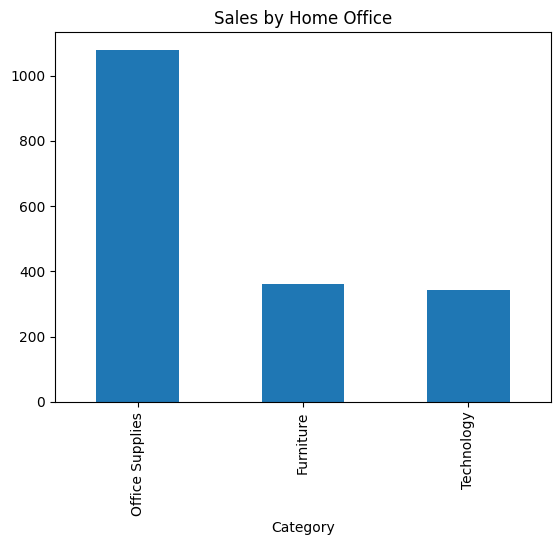

In [112]:
#category-wise sales distribution by home office
home_office_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by Home Office")
plt.show()

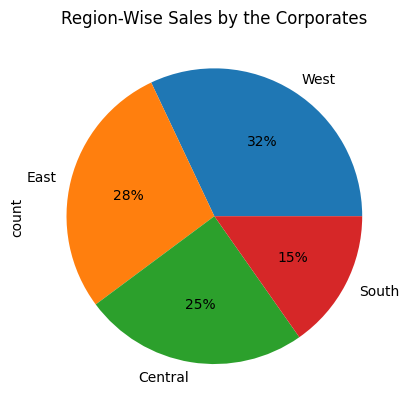

In [113]:
#distirbution of sales pattern about the region by the home office category
home_office_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

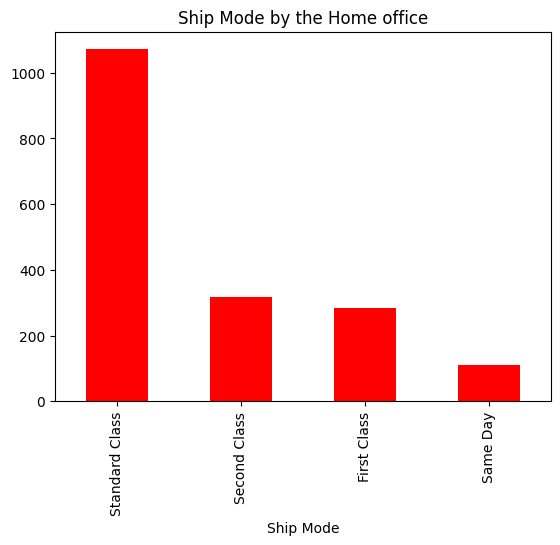

In [114]:
#Shipping mode of items ordered by home office segment
home_office_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Home office")
plt.show()

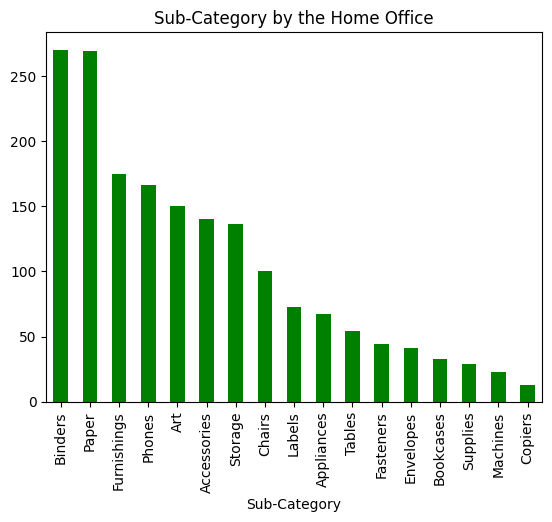

In [115]:
#sub-category items ordered by the Home office segment
home_office_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Home Office")
plt.show()

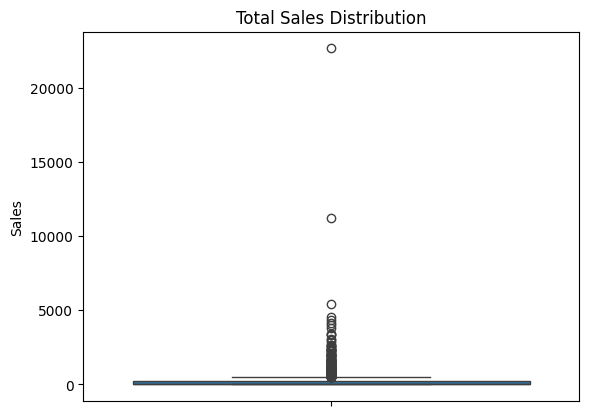

In [116]:
#sales pattern distribution
sns.boxplot(home_office_mod['Sales'])
plt.title("Total Sales Distribution")
plt.show()

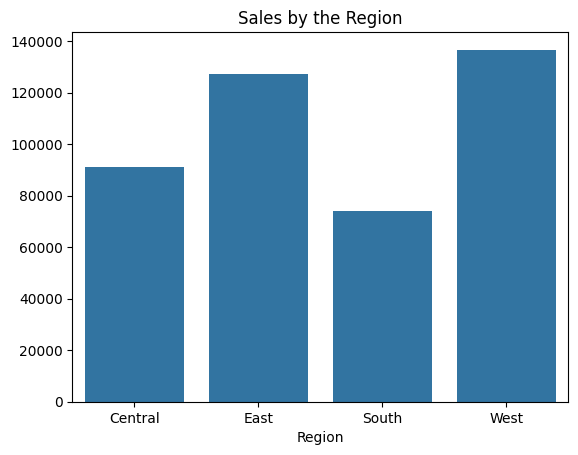

In [117]:
#sales distribution pattern region-wise
sales_region=home_office_mod.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

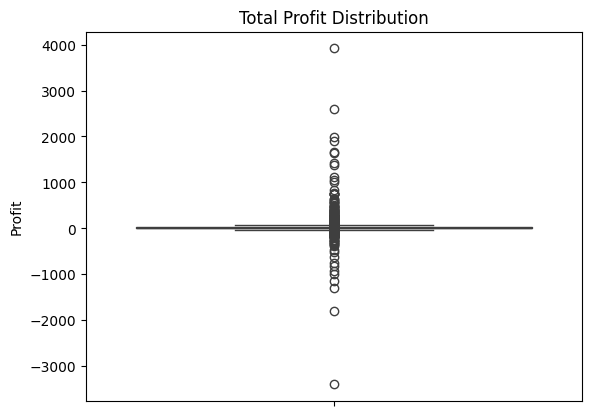

In [118]:
#profit pattern distribution
sns.boxplot(home_office_mod['Profit'])
plt.title("Total Profit Distribution")
plt.show()

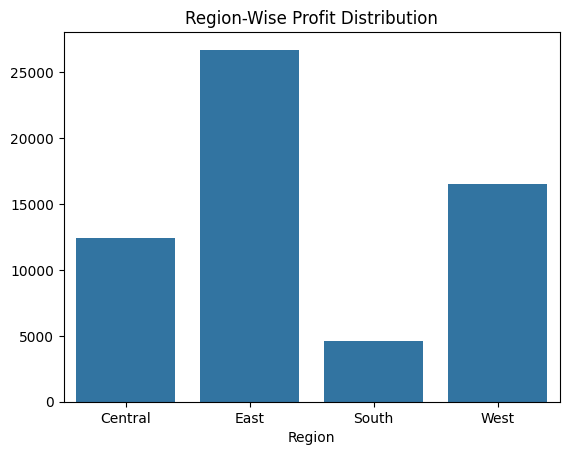

In [119]:
#profit pattern distribution
profit_by_region=home_office_mod.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

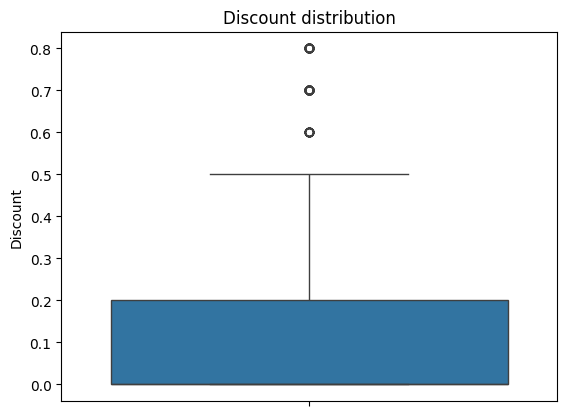

In [120]:
#discount pattern distribution
sns.boxplot(home_office_mod['Discount'])
plt.title("Discount distribution")
plt.show()

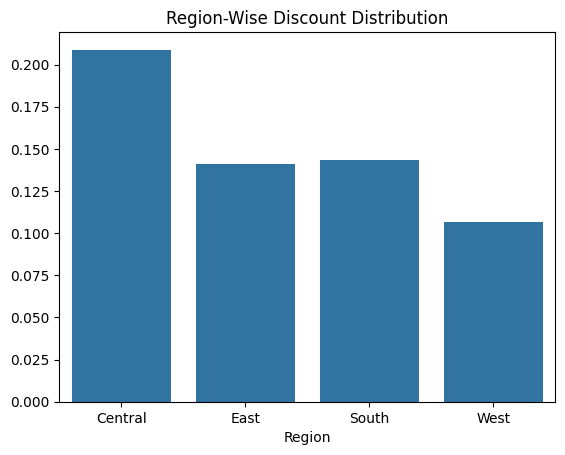

In [121]:
#discount pattern distribution
discount_by_region=home_office_mod.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

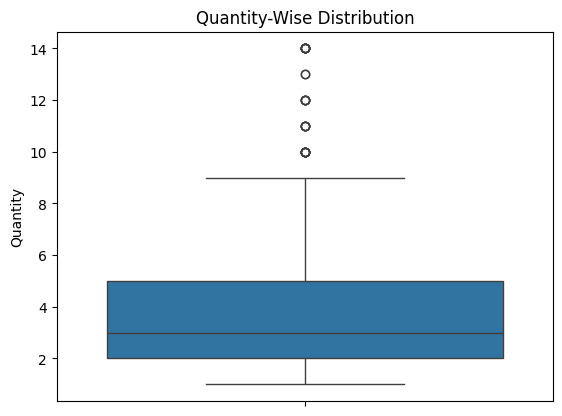

In [122]:
#quantity pattern distribution
sns.boxplot(home_office_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

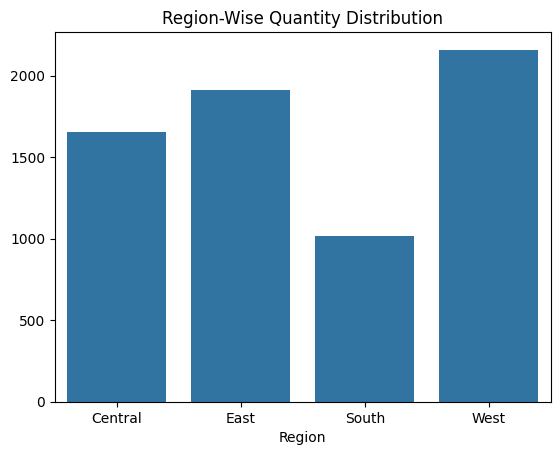

In [123]:
#quantity pattern distribution
quantity_by_region=home_office_mod.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [124]:
oe=OrdinalEncoder()
home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
home_office_mod['State']=oe.fit_transform(home_office_mod[['State']])
home_office_mod['Region']=oe.fit_transform(home_office_mod[['Region']])
home_office_mod['Category']=oe.fit_transform(home_office_mod[['Category']])
home_office_mod['Sub-Category']=oe.fit_transform(home_office_mod[['Sub-Category']])
home_office_mod['Segment']=oe.fit_transform(home_office_mod[['Segment']])
home_office_mod['Country']=oe.fit_transform(home_office_mod[['Country']])

<ipython-input-124-04f7ee526013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
<ipython-input-124-04f7ee526013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
<ipython-input-124-04f7ee526013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [125]:
home_office_mod.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-AP-10002311,1.0,1.0,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-BI-10000756,1.0,3.0,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,2.0,MA-17560,Matt Abelman,0.0,0.0,101.0,...,77095,0.0,OFF-PA-10000249,1.0,12.0,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,OFF-EN-10002986,1.0,7.0,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,FUR-BO-10002545,0.0,4.0,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764


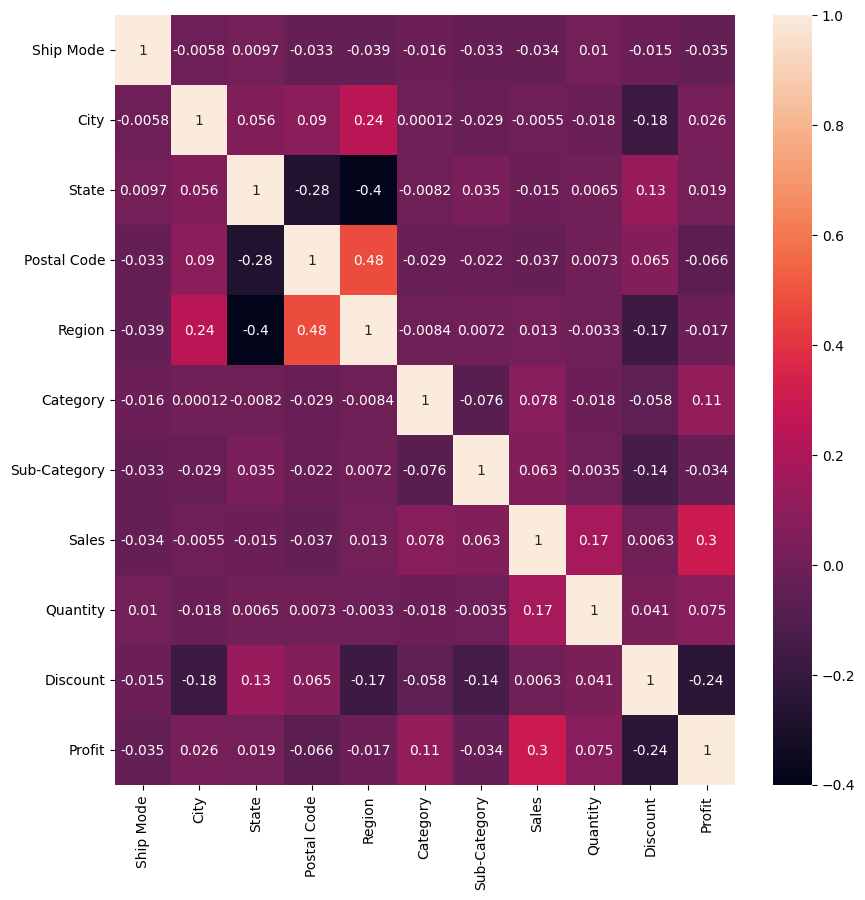

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [127]:
home_office_mod=pd.DataFrame(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
home_office_mod.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,3.0,76.0,40.0,76106,0.0,1.0,1.0,68.8100,5,0.80,-123.8580
15,3.0,76.0,40.0,76106,0.0,1.0,3.0,2.5440,3,0.80,-3.8160
34,2.0,101.0,40.0,77095,0.0,1.0,12.0,29.4720,3,0.20,9.9468
37,3.0,101.0,40.0,77041,0.0,1.0,7.0,113.3280,9,0.20,35.4150
38,3.0,101.0,40.0,77041,0.0,0.0,4.0,532.3992,3,0.32,-46.9764


In [128]:
s=StandardScaler()
home_office_mod['Quantity']=s.fit_transform(home_office_mod[['Quantity']])
home_office_mod['Discount']=s.fit_transform(home_office_mod[['Discount']])

In [129]:
for i in home_office_mod.columns:
  if home_office_mod[i].dtype=='int':
    print(i,':\n')
    q3=home_office_mod[i].quantile(0.75)
    q1=home_office_mod[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)
  elif home_office_mod[i].dtype=='float':
    print(i,':\n')
    q3=home_office_mod[i].quantile(0.75)
    q1=home_office_mod[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)

Ship Mode :

upper limit of Ship Mode: 4.5
lower limit of Ship Mode: 0.5
City :

upper limit of City: 364.5
lower limit of City: -79.5
State :

upper limit of State: 81.0
lower limit of State: -39.0
Postal Code :

upper limit of Postal Code: 189814.0
lower limit of Postal Code: -76346.0
Region :

upper limit of Region: 6.0
lower limit of Region: -2.0
Category :

upper limit of Category: 1.0
lower limit of Category: 1.0
Sub-Category :

upper limit of Sub-Category: 25.5
lower limit of Sub-Category: -10.5
Sales :

upper limit of Sales: 501.6975
lower limit of Sales: -273.74649999999997
Quantity :

upper limit of Quantity: 2.5370699068635285
lower limit of Quantity: -2.787678509169828
Discount :

upper limit of Discount: 1.7377485492500377
lower limit of Discount: -2.2019251965583346
Profit :

upper limit of Profit: 75.92324999999995
lower limit of Profit: -42.379149999999974


In [130]:
home_office_mod=home_office_mod[
    (home_office_mod['Quantity']>=0)&(home_office_mod['Quantity']<=2.5370699068635285) &
    (home_office_mod['Discount']>=0)&(home_office_mod['Discount']<1) &
    (home_office_mod['Sales']>=0)&(home_office_mod['Sales']<=501.6975)
]

In [131]:
#splitting the dataset
x=home_office_mod.drop(columns=['Sales','Profit'],axis='1')
y=home_office_mod['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Predictive Models**

In [132]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [133]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

**Predictive Model's Performance**

In [134]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

Performance of Model 1:

Mean Squared Error: 11188.266620643333 

Root Mean Squared Error: 105.77460290940984 

Mean Absolute Error: 88.02042368318915 

Explained Variance Score: 0.270434051569983 

R2 Score: 0.21534328102312572 





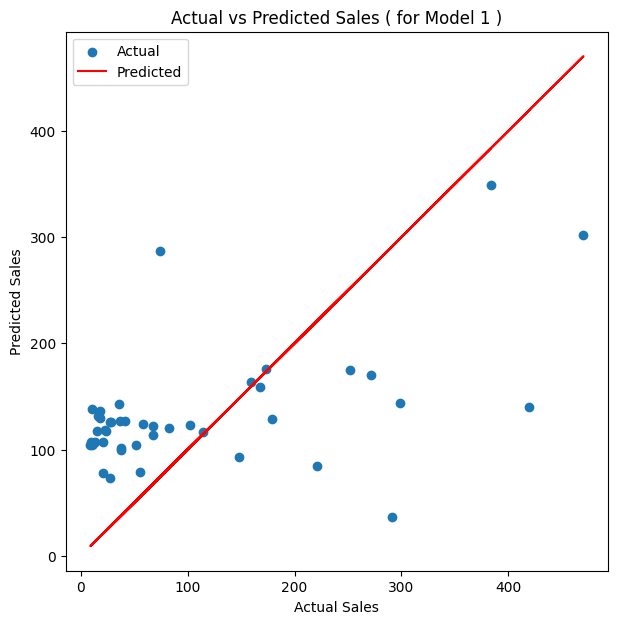



Performance of Model 2:

Mean Squared Error: 14118.055388904048 

Root Mean Squared Error: 118.81942344963659 

Mean Absolute Error: 87.8008539543932 

Explained Variance Score: 0.07598686539624988 

R2 Score: 0.009871019756387822 





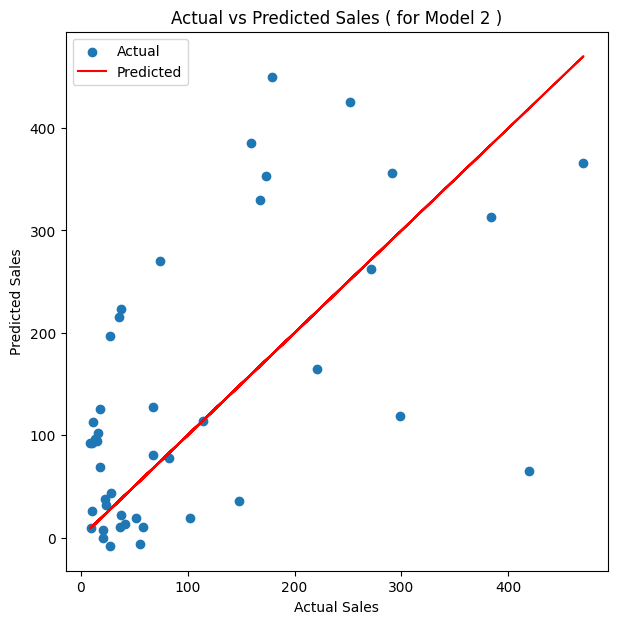



Performance of Model 3:

Mean Squared Error: 8279.516699285943 

Root Mean Squared Error: 90.99184963108478 

Mean Absolute Error: 66.53201860606059 

Explained Variance Score: 0.46101133987623777 

R2 Score: 0.41934004361415644 





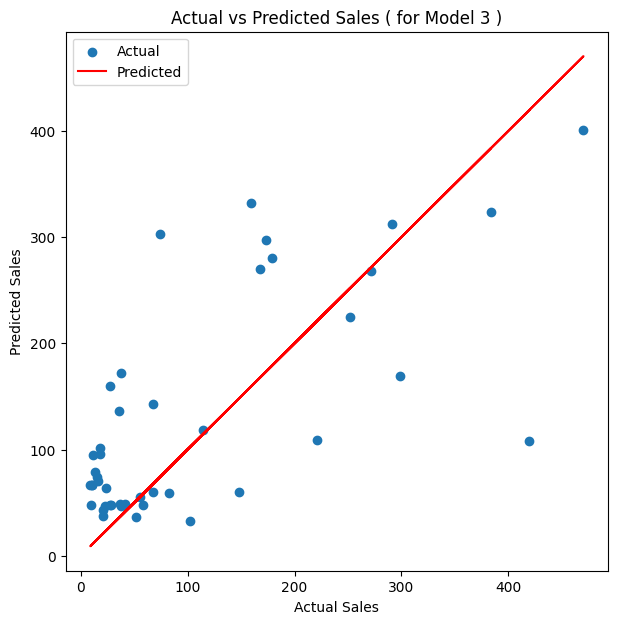



Performance of Model 4:

Mean Squared Error: 13239.76371831826 

Root Mean Squared Error: 115.06417217500093 

Mean Absolute Error: 82.31172196857015 

Explained Variance Score: 0.16403905487339576 

R2 Score: 0.07146746573980811 





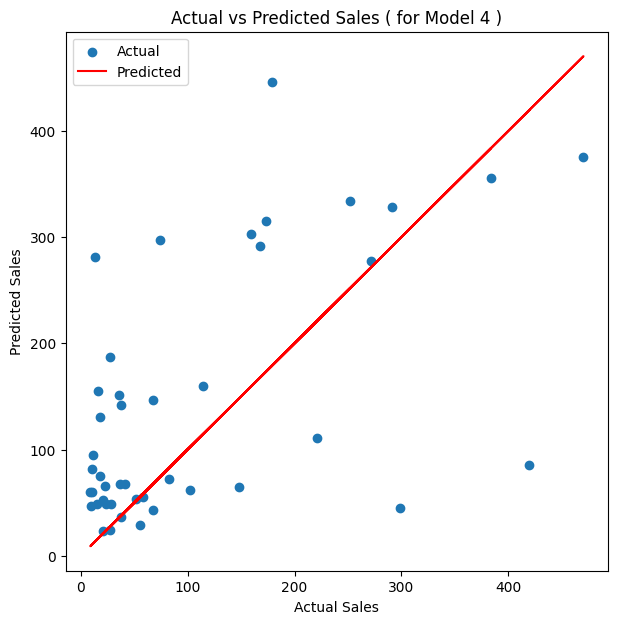



Performance of Model 5:

Mean Squared Error: 11557.400356418488 

Root Mean Squared Error: 107.5053503618238 

Mean Absolute Error: 93.25928656489086 

Explained Variance Score: 0.4001768169037796 

R2 Score: 0.18945515413110192 





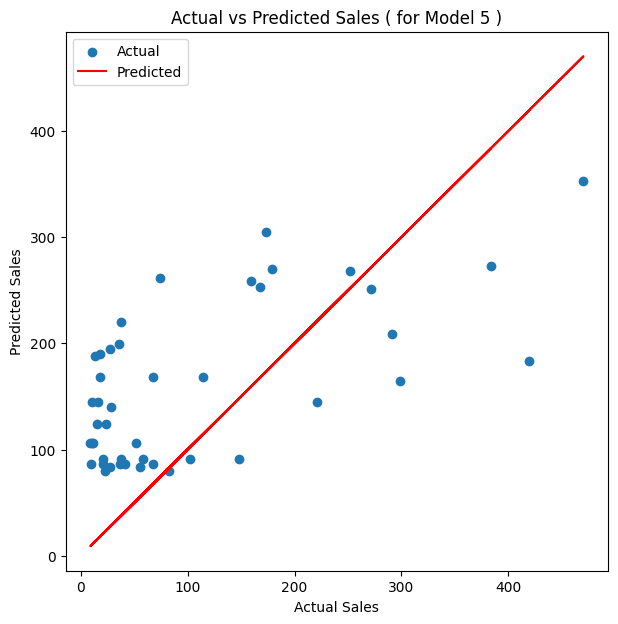



Performance of Model 6:

Mean Squared Error: 14276.302517826365 

Root Mean Squared Error: 119.48348219660475 

Mean Absolute Error: 81.18433181818182 

Explained Variance Score: 0.1293012913033258 

R2 Score: -0.001227184923378477 





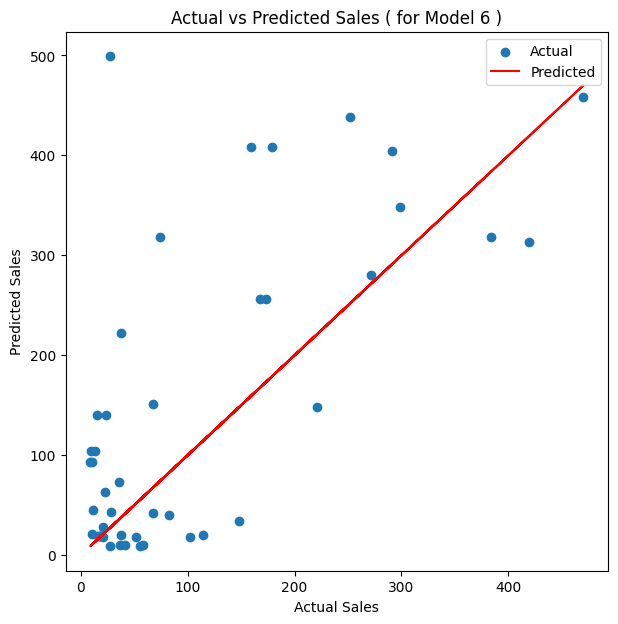



Performance of Model 7:

Mean Squared Error: 21666.804821676364 

Root Mean Squared Error: 147.19648372728327 

Mean Absolute Error: 109.72856363636365 

Explained Variance Score: -0.5034107707015876 

R2 Score: -0.5195386880323849 





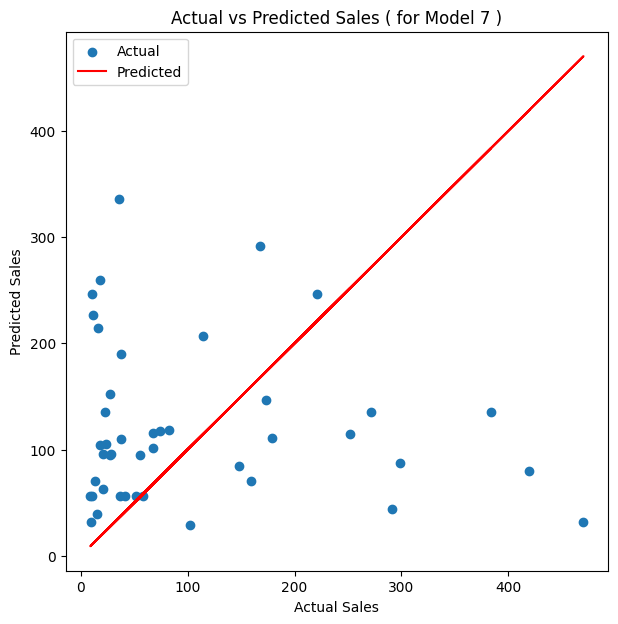



Performance of Model 8:

Mean Squared Error: 15727.884588944005 

Root Mean Squared Error: 125.41086312175675 

Mean Absolute Error: 82.76153124243355 

Explained Variance Score: 0.006931566114948828 

R2 Score: -0.10302969498756309 





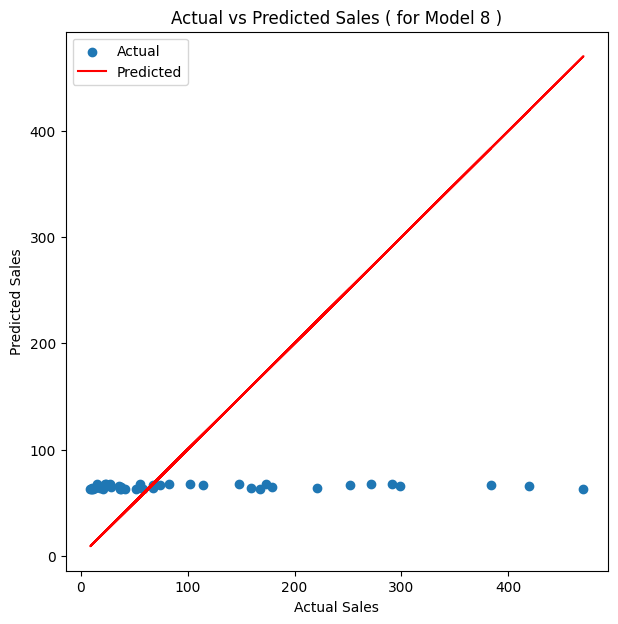



Performance of Model 9:

Mean Squared Error: 11649.97682427586 

Root Mean Squared Error: 107.9350583650922 

Mean Absolute Error: 92.91813571780476 

Explained Variance Score: 0.23144292919528742 

R2 Score: 0.18296257132212534 





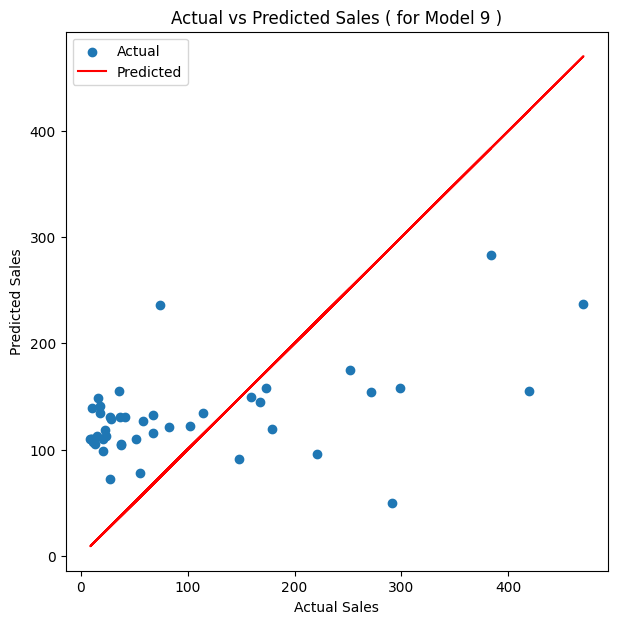



Performance of Model 10:

Mean Squared Error: 11341.229060778143 

Root Mean Squared Error: 106.49520675024836 

Mean Absolute Error: 91.04521517161429 

Explained Variance Score: 0.2540743062485027 

R2 Score: 0.2046157027062644 





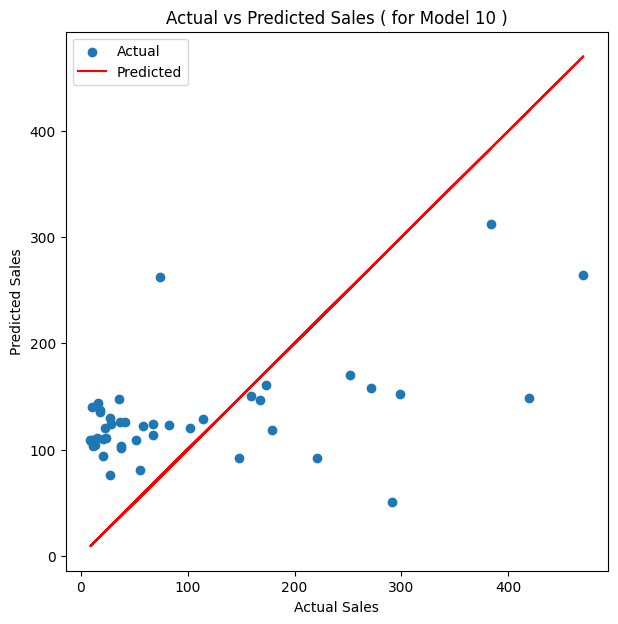

In [135]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

Mean Squared Error: 8701.255177888623
Root Mean Squared Error: 93.28051874796057
Mean Absolute Error: 75.75610463698703
Explained Variance Score: 0.4321382655549689
R2 Score: 0.3897626352356234




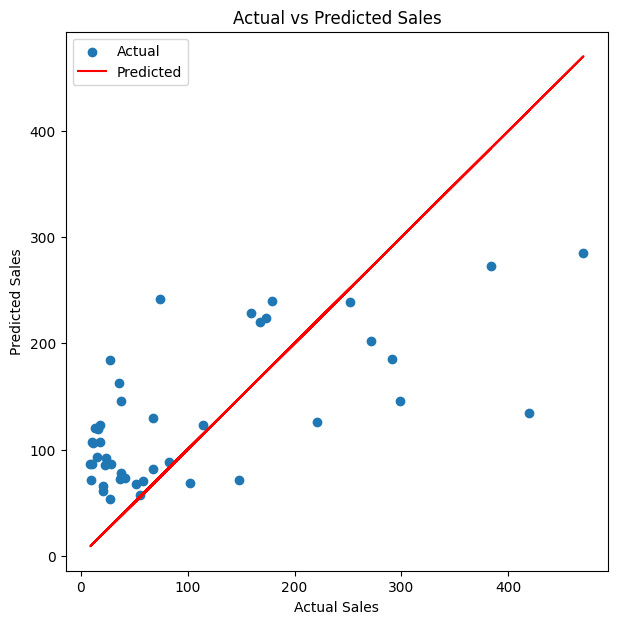

In [136]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.show()

In [138]:
m=home_office_mod.drop(columns=['Profit'],axis='1')
n=home_office_mod['Profit']
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2,random_state=42)

In [139]:
model_1.fit(m_train, n_train)
model_2.fit(m_train, n_train)
model_3.fit(m_train, n_train)
model_4.fit(m_train, n_train)
model_5.fit(m_train, n_train)
model_6.fit(m_train, n_train)
model_7.fit(m_train, n_train)
model_8.fit(m_train, n_train)
model_9.fit(m_train, n_train)
model_10.fit(m_train, n_train)

Lasso()

In [140]:
pred_1 = model_1.predict(m_test)
pred_2 = model_2.predict(m_test)
pred_3 = model_3.predict(m_test)
pred_4=model_4.predict(m_test)
pred_5=model_5.predict(m_test)
pred_6=model_6.predict(m_test)
pred_7=model_7.predict(m_test)
pred_8=model_8.predict(m_test)
pred_9=model_9.predict(m_test)
pred_10=model_10.predict(m_test)

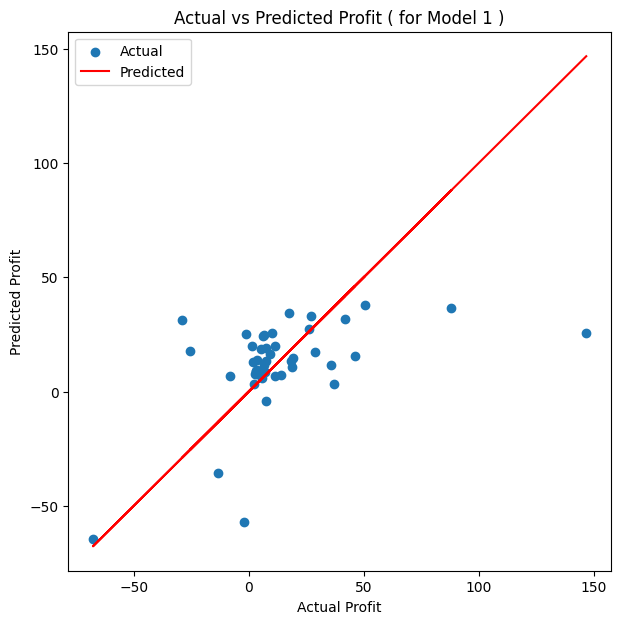

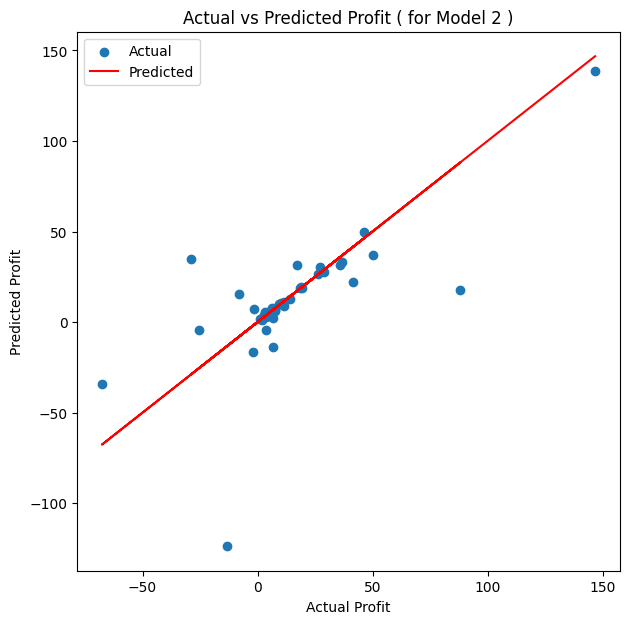

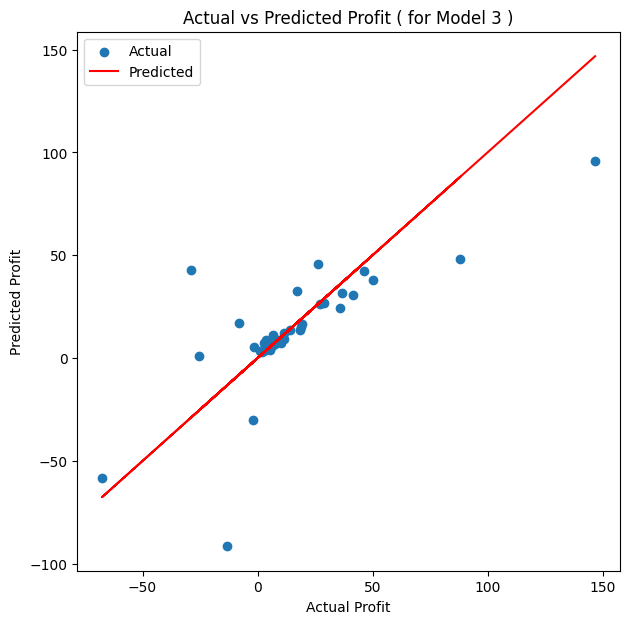

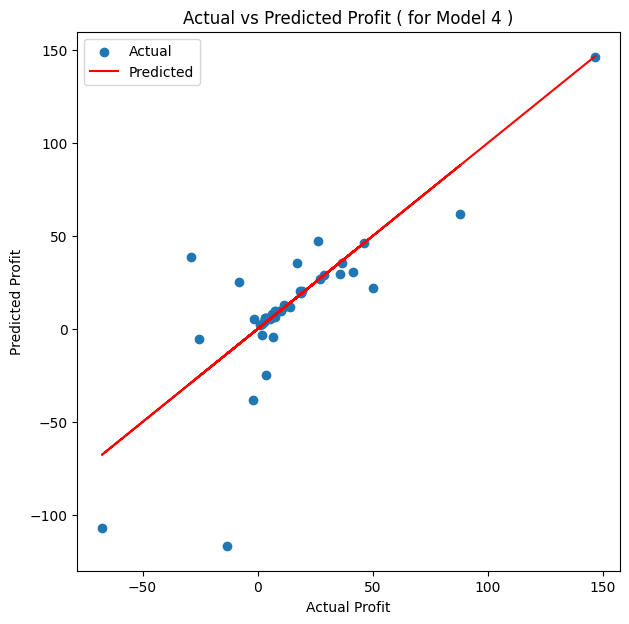

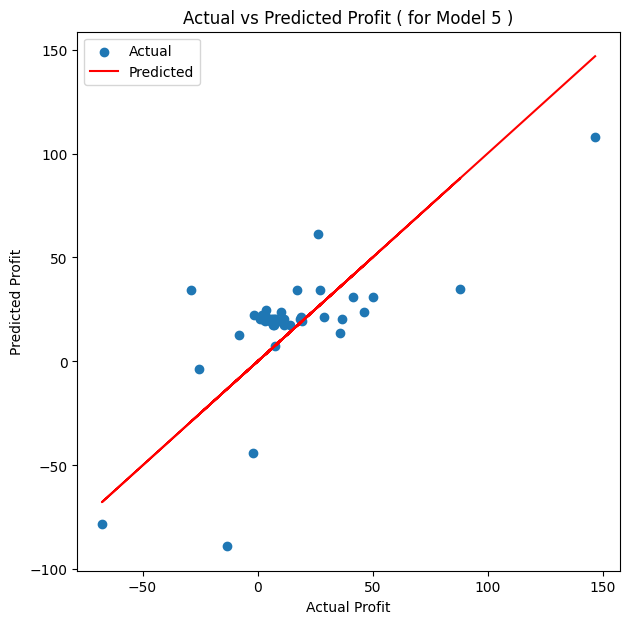

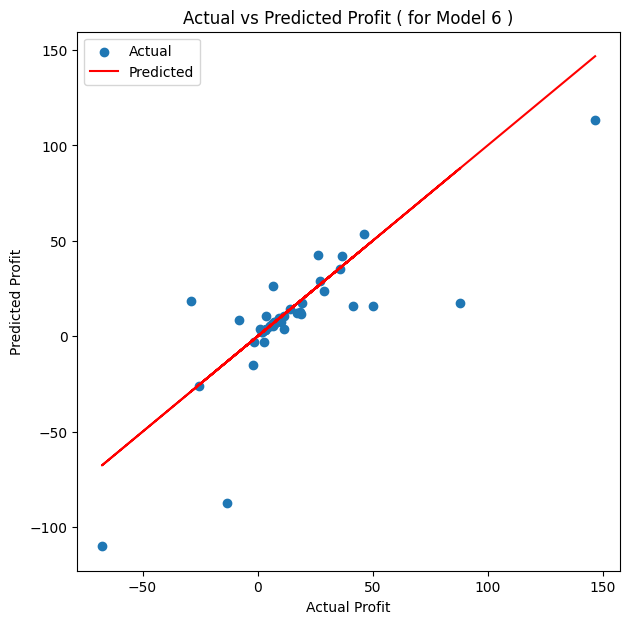

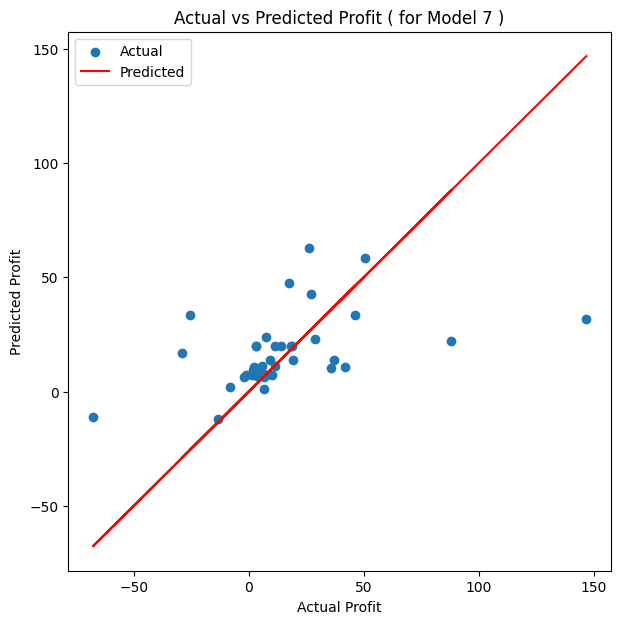

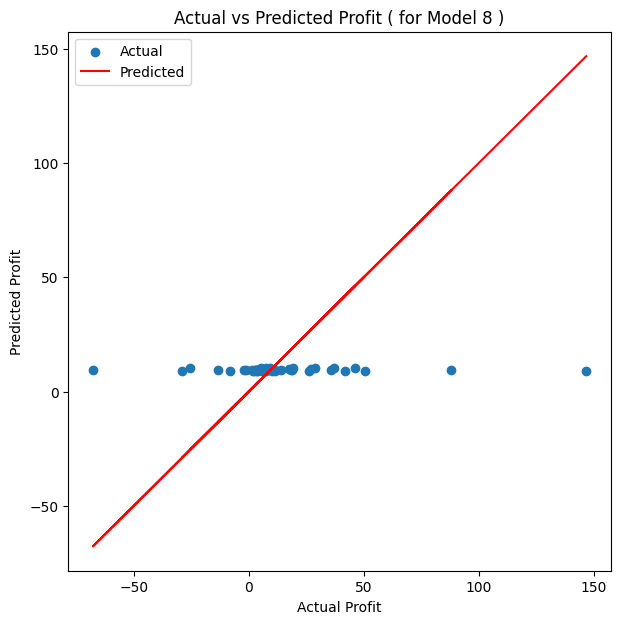

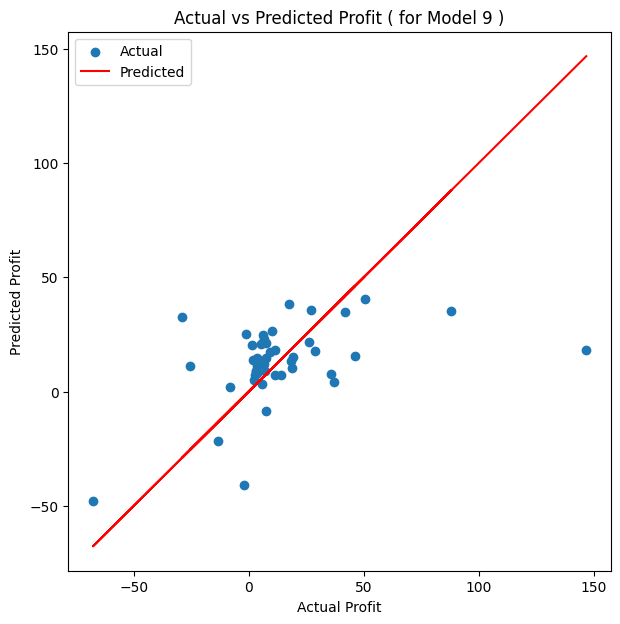

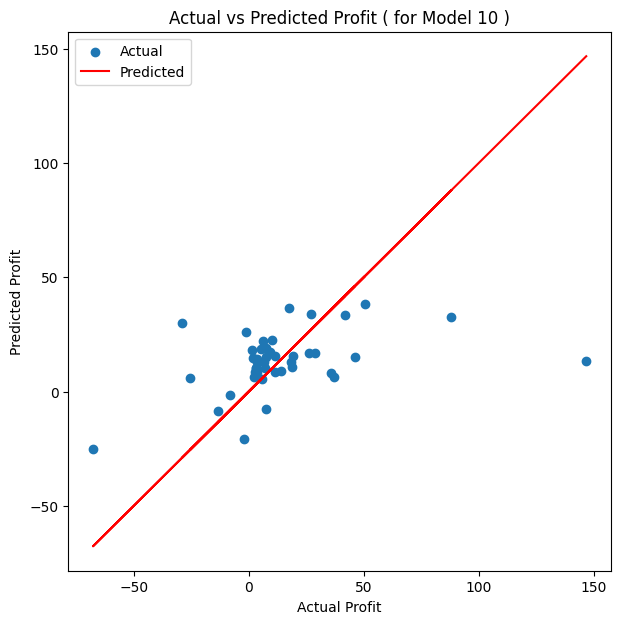

In [141]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  plt.figure(figsize=(7,7))
  plt.scatter(n_test,i)
  plt.plot(n_test,n_test,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1


Mean Squared Error: 430.4893533309751
Root Mean Squared Error: 20.748237354796554
Mean Absolute Error: 12.881536102953419
Explained Variance Score: 0.5435009760162164
R2 Score: 0.5421764488665455




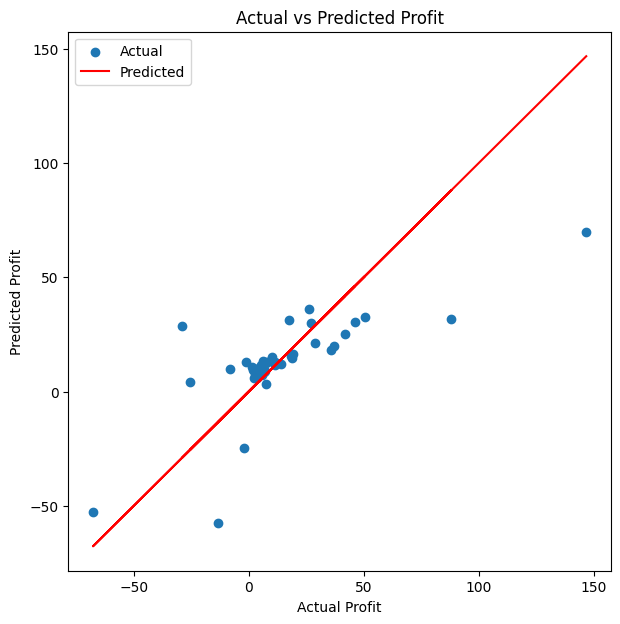

In [144]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(n_test, pred_final))
print("Explained Variance Score:", explained_variance_score(n_test, pred_final))
print("R2 Score:", r2_score(n_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.show()